In [12]:
import numpy as np
import pandas as pd
#reading the csv file
df=pd.read_csv("C:/Users/STUDENT/Downloads/youtube_revenuenewset.csv")
print(df)

   video_id    category   views  watchtime  revenue
0     vid_1        News  122958        261   252.96
1     vid_2   Education  672155      37165   719.03
2     vid_3       Vlogs  132932      26657  1814.59
3     vid_4   Education  366838      33863   551.54
4     vid_5        News  260178      32706  1298.90
..      ...         ...     ...        ...      ...
95   vid_96  Technology  172829      49025   992.85
96   vid_97      Gaming  272836      43041   365.86
97   vid_98      Sports  439974      21934   739.27
98   vid_99  Technology  990913      18147  1490.90
99  vid_100   Education  203283      26205  1444.67

[100 rows x 5 columns]


In [17]:
#Replace missing revenue with zero.
df.isna()
df.fillna(0)


,video_id,category,views,watchtime,revenue
0,vid_1,News,122958,261,252.96
1,vid_2,Education,672155,37165,719.03
2,vid_3,Vlogs,132932,26657,1814.59
3,vid_4,Education,366838,33863,551.54
4,vid_5,News,260178,32706,1298.90
...,...,...,...,...,...
95,vid_96,Technology,172829,49025,992.85
96,vid_97,Gaming,272836,43041,365.86
97,vid_98,Sports,439974,21934,739.27
98,vid_99,Technology,990913,18147,1490.90


In [44]:
#Compute average revenue by category.
grouped=df["revenue"].groupby(df["category"])
grouped.mean()

category
Comedy         967.260000
Education     1016.692500
Gaming         956.385000
Music          782.566471
News          1157.120000
Sports        1095.717333
Technology    1234.512000
Vlogs         1251.681818
Name: revenue, dtype: float64

In [39]:
#Group by views range to identify profitable thresholds.
bins = [0, 10000, 100000, 1000000, 10000000]
labels = ['<10K', '10K–100K', '100K–1M', '1M+']
df['view_range'] = pd.cut(df['views'], bins=bins, labels=labels, include_lowest=True)
revenue_by_views = df.groupby('view_range', observed=True)['revenue'].mean()
print(revenue_by_views)


view_range
10K–100K     566.154286
100K–1M     1071.942903
Name: revenue, dtype: float64


In [42]:
# Replace missing watch_time values with median.
k=df["watchtime"].median()
df["watchtime"]=df["watchtime"].fillna(k)
df["watchtime"]

0       261
1     37165
2     26657
3     33863
4     32706
      ...  
95    49025
96    43041
97    21934
98    18147
99    26205
Name: watchtime, Length: 100, dtype: int64

In [37]:
#correlate watchtime and revenue
correlation = df['watchtime'].corr(df['revenue'])
print("Correlation between watch time and revenue:", correlation)



Correlation between watch time and revenue: 0.0887852535404871


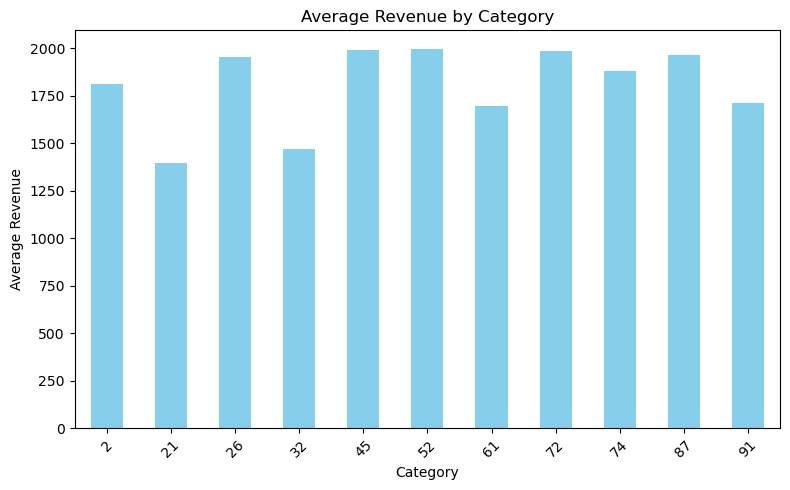

In [43]:
#Plot bar and scatter charts.
grouped.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title('Average Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


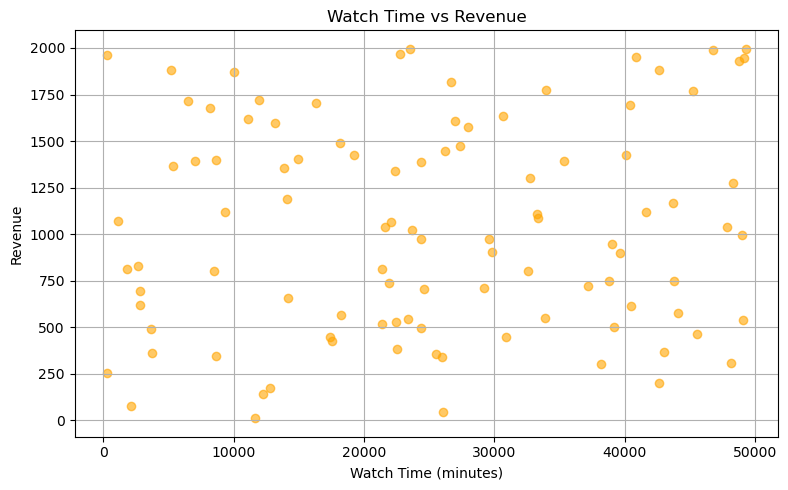

In [33]:
plt.figure(figsize=(8,5))
plt.scatter(df['watchtime'], df['revenue'], alpha=0.6, color='orange')
plt.title('Watch Time vs Revenue')
plt.xlabel('Watch Time (minutes)')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()
